In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
automobile_df = pd.read_csv('auto-mpg-processed.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
365,21.5,6,231.0,115,3245,15.4,41
232,37.2,4,86.0,65,2019,16.4,40
342,30.0,4,88.0,76,2065,14.5,49
273,26.0,4,96.0,69,2189,18.0,48
219,29.0,4,85.0,52,2035,22.2,44


In [3]:
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
x_train.sample(5)

,horsepower
62,74
267,72
144,210
109,88
258,112


In [5]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [6]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6108383359952119


In [7]:
y_pred = linear_model.predict(x_test)

In [8]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.58630461081661


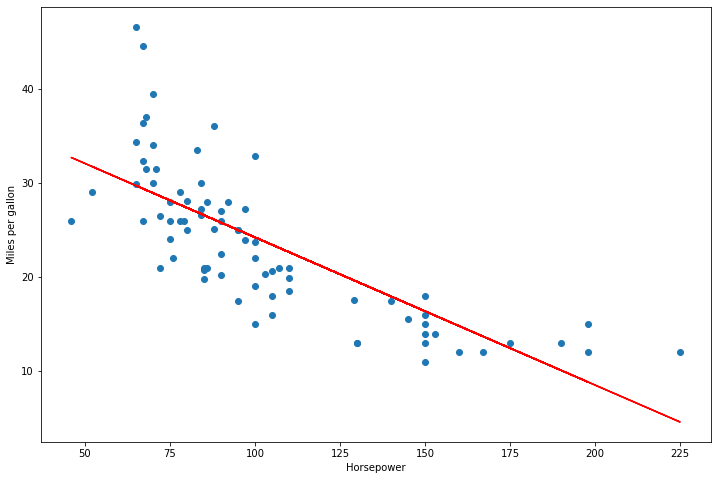

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show()

In [10]:
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.36325235491918084
Testing score:  0.17888222942313659


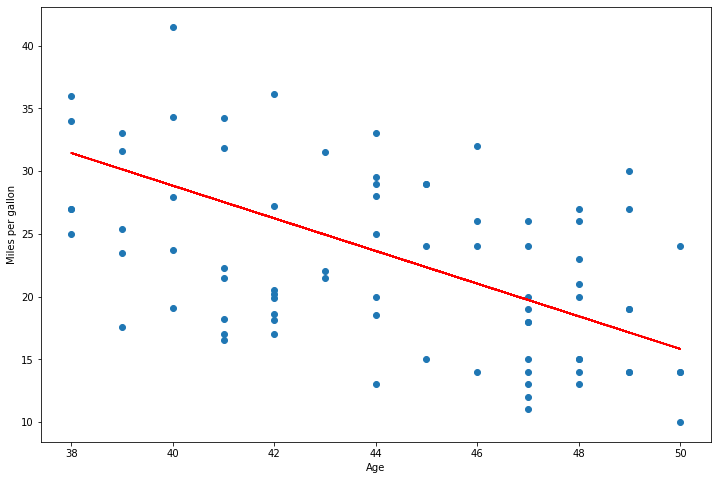

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Miles per gallon')
plt.show()

In [21]:
X = automobile_df[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7247053775180958


In [22]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

In [23]:
print(coef)

cylinders      -0.241714
acceleration   -0.149250
horsepower     -0.049284
displacement   -0.006058
weight         -0.004789
dtype: float64


In [24]:
y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6320612045814402


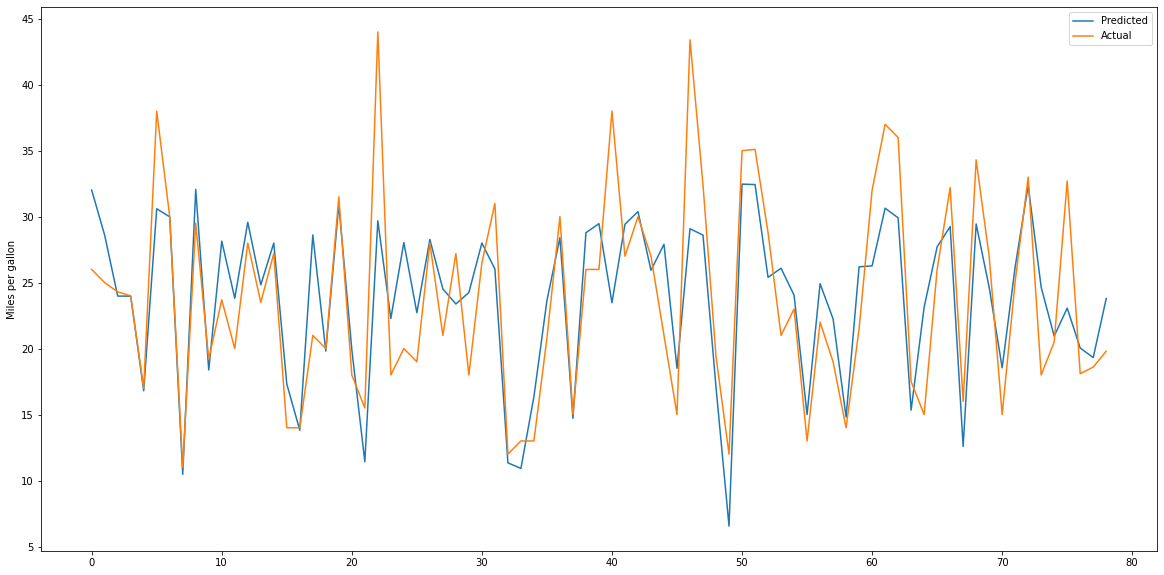

In [25]:
plt.figure(figsize=(20, 10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Miles per gallon')

plt.legend()
plt.show()